# Case challenge // Product analytics

Case challenge 3: Product - Case Challenge with public datasets

Instructions:
You are the product analyst for an e-commerce site that sells unique all-occasion gifts mainly to wholesalers. The marketing department wants to send more personalized product offers to its customer base, but they need help with understanding what different types of targeted offers they should send and to whom and how often. Your job is to help devise a product offer strategy based on customer sales data.

Download Dataset:
https://archive.ics.uci.edu/ml/datasets/Online+Retail

Deliverable:
A short presentation of your analysis, key insights, and recommendations to the team as to what groups of customers they should target.


-------------


Content:

- Exploratory analysis
- UK Data
- FR Data (France)
- UK Clustering (Started but not finalized)

Based on this code I produced a deliverable containing presentation of the data, assumptions, findings, a strategy, quantified outcomes as well as suggestions for next steps (how to refine this analysis further together with other internal departments).

# Exploratory analysis

In [695]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [696]:
data = pd.read_csv("C:/Users/annar/OneDrive/Skrivbord/Project 6 Math and Stats/Online-Retail.csv")

In [697]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [698]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [699]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [700]:
data['Date'] = pd.to_datetime(data['InvoiceDate'])
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00


In [701]:
data['Date']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: Date, Length: 541909, dtype: datetime64[ns]

In [702]:
data['Month_2'] = data['Date'].dt.month
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010-12-01 08:26:00,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010-12-01 08:26:00,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010-12-01 08:26:00,12


In [703]:
data[['Month', 'Date', 'rest_time']] = data['InvoiceDate'].str.split('/', expand=True)
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26


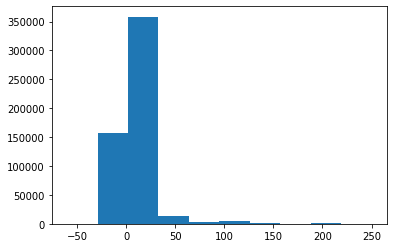

In [704]:
plt.hist(data['Quantity'], range=(-60, 250))
plt.show()

In [705]:
#Filter out all negative quantities, only keep quantities above 0
data_filter = data[data['Quantity'] > 0] 
data_filter.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26


In [706]:
data_filter.describe()

,Quantity,UnitPrice,CustomerID,Month_2
count,531285.000000,531285.000000,397924.000000,531285.000000
mean,10.655262,3.857296,15294.315171,7.560244
std,156.830323,41.810047,1713.169877,3.508717
min,1.000000,-11062.060000,12346.000000,1.000000
25%,1.000000,1.250000,13969.000000,5.000000
50%,3.000000,2.080000,15159.000000,8.000000
75%,10.000000,4.130000,16795.000000,11.000000
max,80995.000000,13541.330000,18287.000000,12.000000


<function matplotlib.pyplot.show(close=None, block=None)>

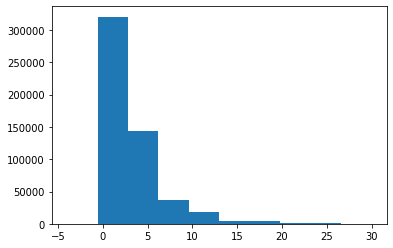

In [707]:
plt.hist(data_filter['UnitPrice'], range=(-4, 30))
plt.show

In [708]:
data_filter[data_filter['UnitPrice'] < 0].count()

InvoiceNo      2
StockCode      2
Description    2
Quantity       2
InvoiceDate    2
UnitPrice      2
CustomerID     0
Country        2
Date           2
Month_2        2
Month          2
rest_time      2
dtype: int64

In [709]:
print(data_filter[data_filter['UnitPrice'] < 0])

       InvoiceNo StockCode      Description  Quantity      InvoiceDate  \
299983   A563186         B  Adjust bad debt         1  8/12/2011 14:51   
299984   A563187         B  Adjust bad debt         1  8/12/2011 14:52   

        UnitPrice  CustomerID         Country Date  Month_2 Month   rest_time  
299983  -11062.06         NaN  United Kingdom   12        8     8  2011 14:51  
299984  -11062.06         NaN  United Kingdom   12        8     8  2011 14:52  


In [710]:
#Remove the two rows with negative UnitPrice (as they are adjustments and not part of the sales)
data_filter = data_filter.drop(labels=[299983, 299984])

In [711]:
#Now we have better data to explore, only quantities above 0 and no negative unit prices
data_filter.describe()

,Quantity,UnitPrice,CustomerID,Month_2
count,531283.000000,531283.000000,397924.000000,531283.000000
mean,10.655299,3.898954,15294.315171,7.560242
std,156.830617,35.876279,1713.169877,3.508723
min,1.000000,0.000000,12346.000000,1.000000
25%,1.000000,1.250000,13969.000000,5.000000
50%,3.000000,2.080000,15159.000000,8.000000
75%,10.000000,4.130000,16795.000000,11.000000
max,80995.000000,13541.330000,18287.000000,12.000000


In [712]:
data_filter.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26


In [713]:
#How many orders have each CustomerID made?
data_filter_group_customer = data_filter.groupby(['CustomerID'])['InvoiceNo'].count()
data_filter_group_customer

CustomerID
12346.0      1
12347.0    182
12348.0     31
12349.0     73
12350.0     17
          ... 
18280.0     10
18281.0      7
18282.0     12
18283.0    756
18287.0     70
Name: InvoiceNo, Length: 4339, dtype: int64

In [714]:
#Most CustomerID's place around 100 orders during this time period, but it's quite spread out
data_filter_group_customer.describe()

count    4339.000000
mean       91.708689
std       228.792852
min         1.000000
25%        17.000000
50%        41.000000
75%       100.000000
max      7847.000000
Name: InvoiceNo, dtype: float64

In [715]:
#How much have each product sold during this period? What quantity?
data_filter_group_product = data_filter.groupby(['Description'])['Quantity'].sum()
data_filter_group_product

Description
 4 PURPLE FLOCK DINNER CANDLES     144
 50'S CHRISTMAS GIFT BAG LARGE    1915
 DOLLY GIRL BEAKER                2455
 I LOVE LONDON MINI BACKPACK       389
 I LOVE LONDON MINI RUCKSACK         1
                                  ... 
wrongly coded 20713                800
wrongly coded 23343               1000
wrongly marked                      48
wrongly marked 23343               200
wrongly sold (22719) barcode       170
Name: Quantity, Length: 4077, dtype: int64

In [716]:
data_filter_group_product.sort_values()

Description
SET 10 CARDS CHRISTMAS BAUBLE 16954        1
DUSTY PINK CHRISTMAS TREE 30CM             1
CAPIZ CHANDELIER                           1
BLOSSOM IMAGES SCRAP BOOK SET              1
LILY BROOCH WHITE/SILVER COLOUR            1
                                       ...  
WHITE HANGING HEART T-LIGHT HOLDER     37895
JUMBO BAG RED RETROSPOT                48478
WORLD WAR 2 GLIDERS ASSTD DESIGNS      55047
MEDIUM CERAMIC TOP STORAGE JAR         78033
PAPER CRAFT , LITTLE BIRDIE            80995
Name: Quantity, Length: 4077, dtype: int64

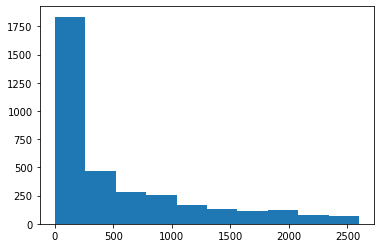

In [717]:
#Most products sell between 1 and 250 (circa)
plt.hist(data_filter_group_product, range=(0, 2600))
plt.show()

In [718]:
#What is the value of each product sold
data_filter['Value'] = data_filter['Quantity'] * data_filter['UnitPrice']
data_filter.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34


In [719]:
#Only keep the rows with UnitPrice above 0
data_filter_2 = data_filter[data_filter['UnitPrice'] > 0]
data_filter_2.describe()

,Quantity,UnitPrice,CustomerID,Month_2,Value
count,530104.000000,530104.000000,397884.000000,530104.000000,530104.000000
mean,10.542037,3.907625,15294.423453,7.560611,20.121871
std,155.524124,35.915681,1713.141560,3.508496,270.356743
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,1.000000,1.250000,13969.000000,5.000000,3.750000
50%,3.000000,2.080000,15159.000000,8.000000,9.900000
75%,10.000000,4.130000,16795.000000,11.000000,17.700000
max,80995.000000,13541.330000,18287.000000,12.000000,168469.600000


In [720]:
#What product has generated most value during this time period
data_filter_group_value = data_filter_2.groupby(['Description'])['Value'].sum()
data_filter_group_value

Description
 4 PURPLE FLOCK DINNER CANDLES       290.80
 50'S CHRISTMAS GIFT BAG LARGE      2343.63
 DOLLY GIRL BEAKER                  2891.25
 I LOVE LONDON MINI BACKPACK        1628.17
 I LOVE LONDON MINI RUCKSACK           4.15
                                     ...   
ZINC T-LIGHT HOLDER STARS SMALL     4197.83
ZINC TOP  2 DOOR WOODEN SHELF        270.08
ZINC WILLIE WINKIE  CANDLE STICK    2713.55
ZINC WIRE KITCHEN ORGANISER          239.97
ZINC WIRE SWEETHEART LETTER TRAY     275.62
Name: Value, Length: 4026, dtype: float64

In [721]:
data_filter_group_value.sort_values()

Description
PADS TO MATCH ALL CUSHIONS                 0.003
HEN HOUSE W CHICK IN NEST                  0.420
SET 12 COLOURING PENCILS DOILEY            0.650
VINTAGE BLUE TINSEL REEL                   0.840
PINK CRYSTAL GUITAR PHONE CHARM            0.850
                                         ...    
PARTY BUNTING                          99504.330
WHITE HANGING HEART T-LIGHT HOLDER    106292.770
PAPER CRAFT , LITTLE BIRDIE           168469.600
REGENCY CAKESTAND 3 TIER              174484.740
DOTCOM POSTAGE                        206248.770
Name: Value, Length: 4026, dtype: float64

In [722]:
#How much have each product sold during this period? What quantity? (Result seem to be similar to above)
data_filter_group_product_2 = data_filter_2.groupby(['Description'])['Quantity'].sum()
data_filter_group_product_2

Description
 4 PURPLE FLOCK DINNER CANDLES       144
 50'S CHRISTMAS GIFT BAG LARGE      1915
 DOLLY GIRL BEAKER                  2455
 I LOVE LONDON MINI BACKPACK         389
 I LOVE LONDON MINI RUCKSACK           1
                                    ... 
ZINC T-LIGHT HOLDER STARS SMALL     5089
ZINC TOP  2 DOOR WOODEN SHELF         13
ZINC WILLIE WINKIE  CANDLE STICK    2934
ZINC WIRE KITCHEN ORGANISER           30
ZINC WIRE SWEETHEART LETTER TRAY      83
Name: Quantity, Length: 4026, dtype: int64

In [723]:
data_filter_group_product_2.sort_values()

Description
TINY CRYSTAL BRACELET RED                 1
SET 12 COLOURING PENCILS DOILEY           1
PINK CRYSTAL GUITAR PHONE CHARM           1
FILIGREE DIAMANTE CHAIN                   1
PINK BERTIE MOBILE PHONE CHARM            1
                                      ...  
WHITE HANGING HEART T-LIGHT HOLDER    37891
JUMBO BAG RED RETROSPOT               48474
WORLD WAR 2 GLIDERS ASSTD DESIGNS     55047
MEDIUM CERAMIC TOP STORAGE JAR        78033
PAPER CRAFT , LITTLE BIRDIE           80995
Name: Quantity, Length: 4026, dtype: int64

In [724]:
data_filter_2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34


In [725]:
#What countries has the highest mean value?
data_filter_group_country = data_filter_2.groupby(['Country'])['Value'].mean()

In [726]:
data_filter_group_country.sort_values()

Country
Unspecified              10.649753
Saudi Arabia             16.213333
RSA                      17.584386
United Kingdom           18.603987
USA                      20.002179
Belgium                  20.283772
European Community       21.670833
Cyprus                   22.134169
Poland                   22.226212
Portugal                 22.483078
Italy                    23.064960
Iceland                  23.681319
Canada                   24.280662
Malta                    24.335625
Spain                    24.789497
France                   24.945297
Germany                  25.317162
Austria                  25.624824
Channel Islands          27.340160
Israel                   27.577153
United Arab Emirates     27.974706
Switzerland              29.038606
Greece                   32.831172
Finland                  32.913985
Czech Republic           33.069600
Norway                   33.767918
Brazil                   35.737500
EIRE                     35.925724
Lebanon     

In [888]:
#What countries has the most customers?
data_filter_group_country_2 = data_filter_2.groupby(['Country']).nunique()

In [728]:
data_filter_group_country_2['InvoiceNo'].sort_values()

Country
Brazil                      1
Saudi Arabia                1
RSA                         1
Lebanon                     1
Czech Republic              2
United Arab Emirates        3
Bahrain                     3
European Community          4
Lithuania                   4
USA                         5
Greece                      5
Malta                       5
Canada                      6
Singapore                   7
Iceland                     7
Israel                      8
Hong Kong                  11
Unspecified                13
Cyprus                     16
Austria                    17
Denmark                    18
Japan                      19
Poland                     19
Channel Islands            26
Sweden                     36
Norway                     36
Italy                      38
Finland                    41
Switzerland                54
Australia                  57
Portugal                   58
Spain                      90
Netherlands                94
Be

In [729]:
data_filter_group_country_2['InvoiceNo'].sum()

19960

Conclusion

Look at each country separately and identify high spending months and high value products. Start with UK as it will give high impact. 

# UK data

In [730]:
data_UK = data_filter_2[data_filter_2['Country'] == 'United Kingdom']
data_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34


In [731]:
#Remove non-products
data_UK = data_UK[data_UK['Description'] != 'DOTCOM POSTAGE']
data_UK.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,1,12,12,2010 8:26,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,1,12,12,2010 8:26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,1,12,12,2010 8:26,20.34


In [732]:
data_UK.describe()

,Quantity,UnitPrice,CustomerID,Month_2,Value
count,484417.000000,484417.000000,354305.000000,484417.000000,484417.000000
mean,9.623287,3.429523,15552.552166,7.583510,18.205334
std,162.021748,29.980106,1594.533113,3.519373,280.963538
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,1.000000,1.250000,14194.000000,5.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.000000,8.400000
75%,10.000000,4.130000,16931.000000,11.000000,16.940000
max,80995.000000,13541.330000,18287.000000,12.000000,168469.600000


In [735]:
UK_total_quantity = data_UK['Quantity'].sum()
UK_total_quantity

4661684

In [736]:
UK_total_value = data_UK['Value'].sum()
UK_total_value

8818973.313999997

In [737]:
UK_total_count = data_UK['Value'].count()
UK_total_count

484417

In [738]:
UK_avg_value = data_UK['Value'].mean()
UK_avg_value

18.205334069617535

In [739]:
#Quantifying what an increase avg_value would mean for total value
#20% increase in avg means some 1.6 million extra in total sales
New_UK_total_value = 21.6 * UK_total_count

In [740]:
#Total increase in sales
New_UK_total_value - UK_total_value

1644433.8860000037

In [744]:
#Find out what products in UK has high unit prices
UK_products = data_UK[['Description', 'UnitPrice']]
UK_products[UK_products['UnitPrice'] > 180].sort_values('UnitPrice')

,Description,UnitPrice
112775,LOVE SEAT ANTIQUE WHITE METAL,195.00
166111,LOVE SEAT ANTIQUE WHITE METAL,195.00
182648,LOVE SEAT ANTIQUE WHITE METAL,195.00
183128,LOVE SEAT ANTIQUE WHITE METAL,195.00
114795,LOVE SEAT ANTIQUE WHITE METAL,195.00
156999,LOVE SEAT ANTIQUE WHITE METAL,195.00
110843,LOVE SEAT ANTIQUE WHITE METAL,195.00
156737,LOVE SEAT ANTIQUE WHITE METAL,195.00
220298,LOVE SEAT ANTIQUE WHITE METAL,195.00
191600,LOVE SEAT ANTIQUE WHITE METAL,195.00


In [745]:
data_UK['UnitPrice'].describe()

count    484417.000000
mean          3.429523
std          29.980106
min           0.001000
25%           1.250000
50%           2.100000
75%           4.130000
max       13541.330000
Name: UnitPrice, dtype: float64

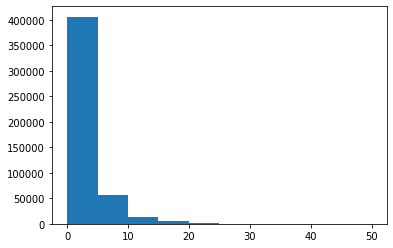

In [746]:
plt.hist(data_UK['UnitPrice'], range=(0, 50))
plt.show()

In [747]:
data_UK['Description'].nunique()

4006

In [789]:
#Bin invoice date
UK_bin_invoicedate = data_UK[['Month_2', 'Value']].groupby('Month_2').agg(['mean'])
UK_bin_invoicedate

,Value
,mean
Month_2,
1,17.598565
2,16.940316
3,17.648884
4,17.220474
5,19.184102
6,18.810736
7,16.774496
8,19.538261


In [790]:
UK_bin_invoicedate.describe()

,Value
,mean
count,12.000000
mean,18.171870
std,1.353090
min,16.640502
25%,17.150434
50%,17.623724
75%,19.272641
max,20.659578


High spending months: May, August, September, December

In [808]:
UK_bin_invoicedate_2 = data_UK[['Month_2', 'Value']]
UK_bin_invoicedate_2 = data_UK.groupby(['Month_2']).mean().reset_index()
UK_bin_invoicedate_2

,Month_2,Quantity,UnitPrice,CustomerID,Value
0,1,10.148732,3.371294,15530.592852,17.598565
1,2,9.286031,3.611171,15583.051188,16.940316
2,3,9.369078,3.537771,15440.851241,17.648884
3,4,10.142910,3.430421,15466.839013,17.220474
4,5,9.810533,3.787790,15469.345766,19.184102
5,6,9.442081,3.449537,15624.823269,18.810736
6,7,9.519105,3.352946,15592.269684,16.774496
7,8,10.932216,3.643189,15596.642644,19.538261
8,9,10.734939,3.154499,15498.400825,19.764659
9,10,9.486809,3.174368,15543.586443,17.281868


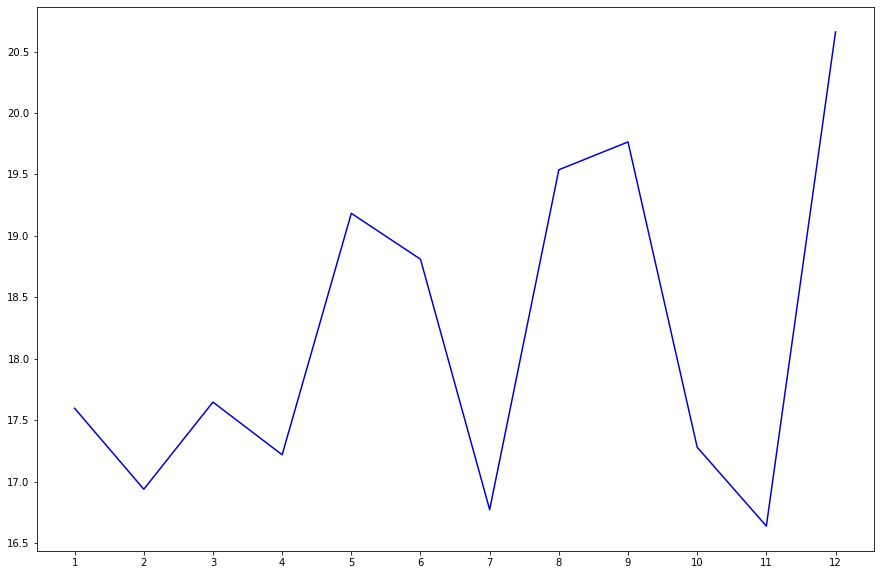

In [817]:
x = UK_bin_invoicedate_2['Month_2']
y_2 = UK_bin_invoicedate_2['Value']

fig= plt.figure(figsize=(15,10))
plt.plot(x, y_2, color='mediumblue', label='Value')
plt.xticks(x)

plt.show()

In [886]:
print(UK_bin_invoicedate_2['Month_2'].corr(UK_bin_invoicedate_2['Value']))

0.37408820290363376


In [885]:
UK_month_sales = data_UK[data_UK['Month_2'] == 8]
UK_month_sales = UK_month_sales.groupby(['Description']).sum().reset_index()
UK_month_sales.head(60).sort_values('Quantity', ascending=False)

,Description,Quantity,UnitPrice,CustomerID,Month_2,Value
12,12 PENCILS SMALL TUBE SKULL,1069,11.95,165956.0,120,601.85
13,12 PENCILS TALL TUBE POSY,544,10.33,457063.0,248,159.10
2,DOLLY GIRL BEAKER,234,55.93,445354.0,296,304.60
33,3 STRIPEY MICE FELTCRAFT,224,52.81,338057.0,200,431.34
14,12 PENCILS TALL TUBE RED RETROSPOT,212,23.46,348757.0,200,177.08
6,10 COLOUR SPACEBOY PEN,206,11.83,180573.0,104,175.88
39,36 DOILIES VINTAGE CHRISTMAS,184,26.14,212697.0,128,269.74
29,3 HEARTS HANGING DECORATION RUSTIC,160,49.53,203589.0,120,454.92
15,12 PENCILS TALL TUBE SKULLS,155,18.86,202866.0,144,141.17
45,36 PENCILS TUBE WOODLAND,143,27.30,188379.0,136,188.43


In [887]:
data_UK['InvoiceNo'].nunique()

18019

In [752]:
data_UK['CustomerID'].nunique()

3920

In [753]:
Picnic_basket = 649.5
#20% of UK customers
UK_20 = 3920 * 0.2
UK_20

784.0

In [754]:
784 * Picnic_basket

509208.0

# FR data

In [828]:
data_FR = data_filter_2[data_filter_2['Country'] == 'France']
data_FR.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,1,12,12,2010 8:45,10.2
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,1,12,12,2010 8:45,15.6


In [829]:
data_FR.describe()

,Quantity,UnitPrice,CustomerID,Month_2,Value
count,8407.000000,8407.000000,8341.000000,8407.000000,8407.000000
mean,13.334483,4.400237,12678.406066,7.514214,24.945297
std,21.070786,65.509139,277.283084,3.493750,74.087155
min,1.000000,0.060000,12413.000000,1.000000,0.290000
25%,6.000000,1.250000,12571.000000,5.000000,11.900000
50%,10.000000,1.790000,12678.000000,9.000000,16.600000
75%,12.000000,3.750000,12689.000000,11.000000,23.400000
max,912.000000,4161.060000,14277.000000,12.000000,4161.060000


In [830]:
#Remove non-products
data_FR = data_FR[data_FR['Description'] != 'DOTCOM POSTAGE']
data_FR.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Date,Month_2,Month,rest_time,Value
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,90.0
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,90.0
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/2010 8:45,3.75,12583.0,France,1,12,12,2010 8:45,45.0
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/2010 8:45,0.85,12583.0,France,1,12,12,2010 8:45,10.2
30,536370,21883,STARS GIFT TAPE,24,12/1/2010 8:45,0.65,12583.0,France,1,12,12,2010 8:45,15.6


In [831]:
data_FR.describe()

,Quantity,UnitPrice,CustomerID,Month_2,Value
count,8407.000000,8407.000000,8341.000000,8407.000000,8407.000000
mean,13.334483,4.400237,12678.406066,7.514214,24.945297
std,21.070786,65.509139,277.283084,3.493750,74.087155
min,1.000000,0.060000,12413.000000,1.000000,0.290000
25%,6.000000,1.250000,12571.000000,5.000000,11.900000
50%,10.000000,1.790000,12678.000000,9.000000,16.600000
75%,12.000000,3.750000,12689.000000,11.000000,23.400000
max,912.000000,4161.060000,14277.000000,12.000000,4161.060000


In [832]:
data_UK.describe()

,Quantity,UnitPrice,CustomerID,Month_2,Value
count,484417.000000,484417.000000,354305.000000,484417.000000,484417.000000
mean,9.623287,3.429523,15552.552166,7.583510,18.205334
std,162.021748,29.980106,1594.533113,3.519373,280.963538
min,1.000000,0.001000,12346.000000,1.000000,0.001000
25%,1.000000,1.250000,14194.000000,5.000000,3.360000
50%,3.000000,2.100000,15522.000000,8.000000,8.400000
75%,10.000000,4.130000,16931.000000,11.000000,16.940000
max,80995.000000,13541.330000,18287.000000,12.000000,168469.600000


In [833]:
FR_total_quantity = data_FR['Quantity'].sum()
FR_total_quantity

112103

In [834]:
FR_total_value = data_FR['Value'].sum()
FR_total_value

209715.11000000002

In [835]:
FR_total_count = data_FR['Value'].count()
FR_total_count

8407

In [836]:
FR_avg_value = data_FR['Value'].mean()
FR_avg_value

24.945296776495752

In [837]:
#Quantifying what an increase avg_value would mean for total value
#20% increase in avg means some 42k extra in total sales
New_FR_total_value = 30 * FR_total_count

In [838]:
#Total increase in sales
New_FR_total_value - FR_total_value

42494.889999999985

In [839]:
#Find out what products in FR has high unit prices
FR_products = data_FR[['Description', 'UnitPrice']]
FR_products[FR_products['UnitPrice'] > 20].sort_values('UnitPrice')

,Description,UnitPrice
498870,SET 3 WICKER STORAGE BASKETS,24.95
421219,BOTANICAL GARDENS WALL CLOCK,25.00
46879,CABIN BAG VINTAGE RETROSPOT,29.95
250500,CABIN BAG VINTAGE RETROSPOT,29.95
7952,PINK PAINTED KASHMIRI CHAIR,42.95
144100,POSTAGE,134.00
261828,POSTAGE,145.00
319701,POSTAGE,145.00
423769,POSTAGE,145.00
39777,CARRIAGE,150.00


In [840]:
data_FR['UnitPrice'].describe()

count    8407.000000
mean        4.400237
std        65.509139
min         0.060000
25%         1.250000
50%         1.790000
75%         3.750000
max      4161.060000
Name: UnitPrice, dtype: float64

In [841]:
data_FR['Description'].nunique()

1564

In [842]:
#Bin invoice date
FR_bin_invoicedate = data_FR[['Month_2', 'Value']].groupby('Month_2').agg(['mean'])
FR_bin_invoicedate

,Value
,mean
Month_2,
1,26.878970
2,20.324487
3,26.769817
4,24.467301
5,24.363596
6,27.709169
7,22.321853
8,24.272337


High spending months: January, March, June, October 

In [843]:
FR_bin_invoicedate.describe()

,Value
,mean
count,12.000000
mean,25.023745
std,4.668485
min,20.324487
25%,22.313035
50%,24.317967
75%,26.797105
max,37.751353


In [846]:
FR_bin_invoicedate = data_FR[['Month_2', 'Value']]
FR_bin_invoicedate = data_FR.groupby(['Month_2']).mean().reset_index()
FR_bin_invoicedate

,Month_2,Quantity,UnitPrice,CustomerID,Value
0,1,13.937879,3.431197,12641.580303,26.878970
1,2,12.744630,2.958640,12634.267303,20.324487
2,3,15.944954,3.154257,12659.117431,26.769817
3,4,10.119469,8.867566,12626.004425,24.467301
4,5,13.538036,3.522642,12808.957123,24.363596
5,6,16.449153,3.302508,12635.443281,27.709169
6,7,12.642857,3.471339,12656.000000,22.321853
7,8,13.985940,3.187223,12638.776801,24.272337
8,9,12.526012,3.195039,12638.613680,22.570366
9,10,15.565953,12.599910,12615.886133,37.751353


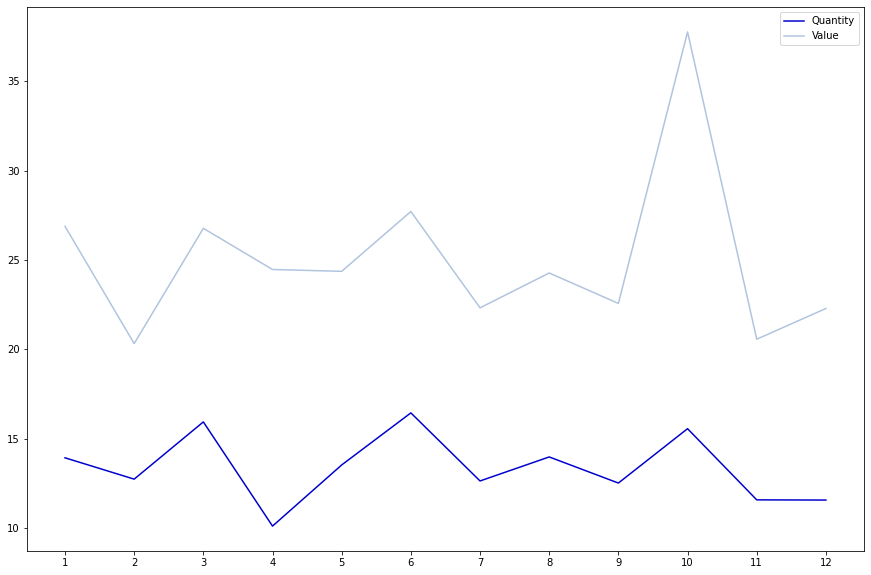

In [883]:
x = FR_bin_invoicedate['Month_2']
y_1 = FR_bin_invoicedate['Quantity']
y_2 = FR_bin_invoicedate['Value']

fig= plt.figure(figsize=(15,10))
plt.plot(x, y_1, color='mediumblue', label='Quantity')
plt.plot(x, y_2, color='lightsteelblue', label='Value')
plt.xticks(x)
plt.legend()

plt.show()

In [884]:
FR_month_sales = data_FR[data_FR['Month_2'] == 4]
FR_month_sales = FR_month_sales.groupby(['Description']).sum().reset_index()
FR_month_sales.head(60).sort_values('Quantity', ascending=False)

,Description,Quantity,UnitPrice,CustomerID,Month_2,Value
59,ICE CREAM SUNDAE LIP GLOSS,96,2.50,25363.0,8,120.00
55,GROW A FLYTRAP OR SUNFLOWER IN TIN,24,1.25,12437.0,4,30.00
39,DOLLY GIRL LUNCH BOX,24,3.90,25377.0,8,46.80
45,"ELEPHANT, BIRTHDAY CARD,",24,0.84,25294.0,8,10.08
48,FELT TOADSTOOL SMALL,24,0.85,12670.0,4,20.40
3,36 PENCILS TUBE WOODLAND,16,1.25,12721.0,4,20.00
2,36 PENCILS TUBE RED RETROSPOT,16,1.25,12721.0,4,20.00
33,CIRCUS PARADE CHILDRENS EGG CUP,15,3.75,37827.0,12,18.75
57,HANGING HEN ON NEST DECORATION,12,1.65,12523.0,4,19.80
52,GIRAFFE WOODEN RULER,12,1.95,12637.0,4,23.40


# UK Clustering

In [771]:
from sklearn.cluster import KMeans
from sklearn import preprocessing
import seaborn as sns

In [772]:
UK_clustering = data_UK[['CustomerID', 'Value']]
UK_clustering = UK_clustering.groupby(['CustomerID']).sum().reset_index()
#UK_clustering = UK_clustering.groupby(['CustomerID'])('Value').sum()
#UK_clustering = UK_clustering[['CustomerID', 'Value']].groupby('CustomerID').agg(['sum'])
UK_clustering

,CustomerID,Value
0,12346.0,77183.60
1,12747.0,4196.01
2,12748.0,33719.73
3,12749.0,4090.88
4,12820.0,942.34
...,...,...
3915,18280.0,180.60
3916,18281.0,80.82
3917,18282.0,178.05
3918,18283.0,2094.88


In [773]:
UK_clustering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3920 entries, 0 to 3919
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CustomerID  3920 non-null   float64
 1   Value       3920 non-null   float64
dtypes: float64(2)
memory usage: 61.4 KB


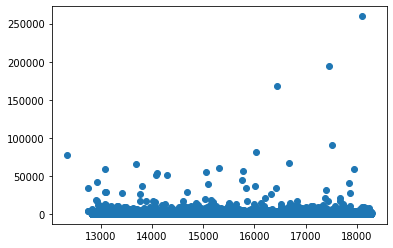

In [774]:
#plot UK_clustering?
x = UK_clustering['CustomerID']
y = UK_clustering['Value']

plt.scatter(x, y)
plt.show()

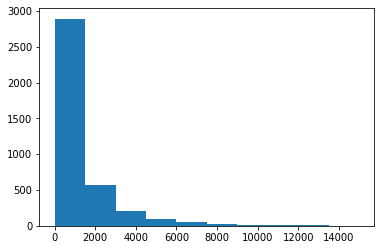

In [775]:
plt.hist(y, range=(0,15000))
plt.show()

In [776]:
#Normalize Values/Y
y_array = np.array(y)
normalized_arr = preprocessing.normalize([y_array])
print(normalized_arr)

[[0.16036456 0.00871806 0.07005957 ... 0.00036993 0.00435254 0.00381732]]


In [777]:
y_normalized = pd.DataFrame(normalized_arr)
y_normalized

,0,1,2,3,4,5,6,7,8,9,...,3910,3911,3912,3913,3914,3915,3916,3917,3918,3919
0,0.160365,0.008718,0.07006,0.0085,0.001958,0.000193,0.001971,0.003656,0.000825,0.003064,...,0.000424,0.000366,0.000698,0.000229,0.000361,0.000375,0.000168,0.00037,0.004353,0.003817


In [778]:
#y_normalized.pivot(columns='', values='0')

In [779]:
#Normalize the whole UK_clustering
d = preprocessing.normalize(UK_clustering)
UK_clustering_normalize = pd.DataFrame(d)
UK_clustering_normalize.head()

,0,1
0,0.157948,0.987447
1,0.949861,0.312672
2,0.353630,0.935386
3,0.952181,0.305534
4,0.997309,0.073308


In [780]:
UK_clustering_normalize.describe()

,0,1
count,3920.000000,3920.000000
mean,0.983907,0.090361
std,0.071640,0.136512
min,0.069546,0.000224
25%,0.994830,0.018794
50%,0.999129,0.041733
75%,0.999823,0.101558
max,1.000000,0.997579


In [781]:
samples = UK_clustering_normalize

In [782]:
model = KMeans(n_clusters=5)

In [783]:
model.fit(samples)

KMeans(n_clusters=5)

In [784]:
labels = model.predict(samples)

In [785]:
print(labels)

[3 4 3 ... 0 2 2]


In [786]:
np.unique(labels, return_counts=True)

(array([0, 1, 2, 3, 4]), array([2782,   71,  800,   33,  234], dtype=int64))

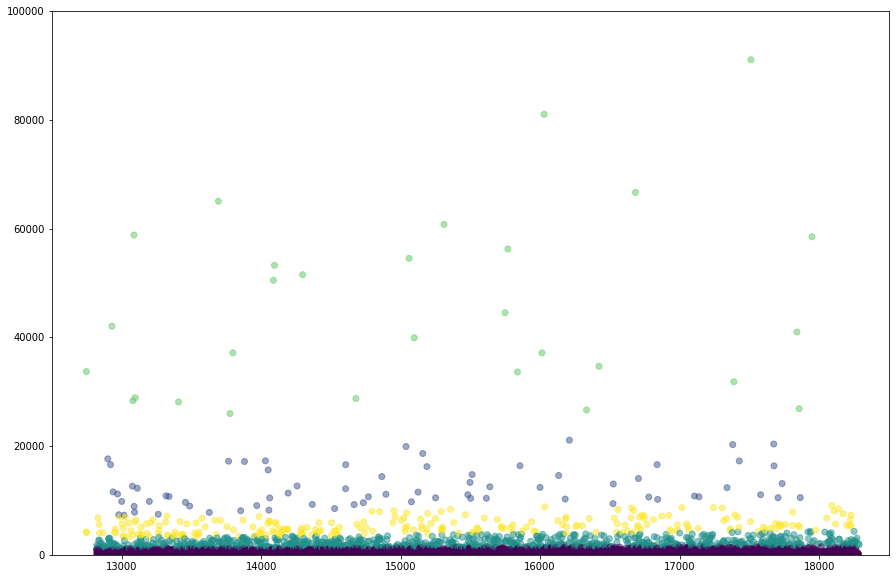

In [787]:
x = UK_clustering['CustomerID']
y = UK_clustering['Value']

fig= plt.figure(figsize=(15,10))
plt.scatter(x, y, c=labels, alpha=0.5)
plt.axis([12500, 18500, 0, 100000])
plt.show()